In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as R2, mean_squared_error as MSE, mean_absolute_error as MAE, accuracy_score

from sklearn.linear_model import LinearRegression

In [102]:
#cd drive/MyDrive/Colab\ Notebooks/IBM_Regression

##Loading Data

In [103]:
df = pd.read_csv('data/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


##Data info

In [104]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [105]:
col = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']
cdf = df[col]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


In [120]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d1ed6d150>,
      dtype=object)

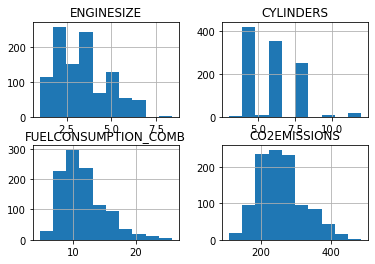

In [106]:
viz = cdf[col]
viz.hist()

Text(0, 0.5, 'CO2 Emission')

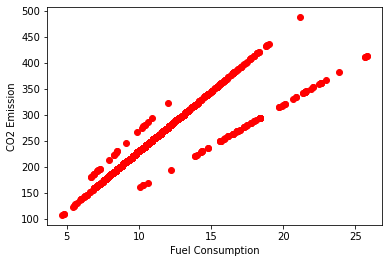

In [107]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel("Fuel Consumption")
plt.ylabel('CO2 Emission')

Text(0, 0.5, 'CO2 Emission')

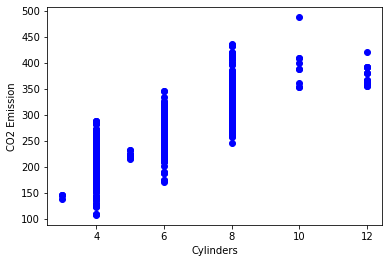

In [108]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission')

##Simple Linear Regression

In [109]:
X = df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=9)

In [110]:
regr_model = LinearRegression()

In [111]:
regr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient and Intercept

In [112]:
print ('Coefficients: ', regr_model.coef_)
print ('Intercept: ',regr_model.intercept_)

Coefficients:  [[39.16539814]]
Intercept:  [124.84303096]


Text(0, 0.5, 'Emission')

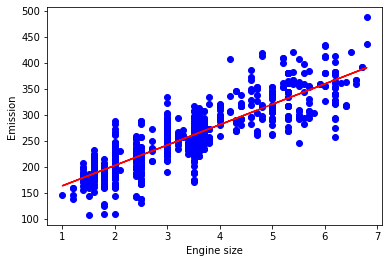

In [113]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regr_model.coef_[0][0]*X_train + regr_model.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Plot based on training data and metrics

In [114]:
training_data_prediction = regr_model.predict(X_train)

In [115]:
print("Mean absolute error: %.2f" % MAE(y_train, training_data_prediction))
print("Squared sum of squares (MSE): %.2f" % MSE(y_train, training_data_prediction))
print("R2-score: %.2f" % R2(y_train, training_data_prediction))

Mean absolute error: 23.41
Squared sum of squares (MSE): 946.44
R2-score: 0.76


Text(0, 0.5, 'Emission')

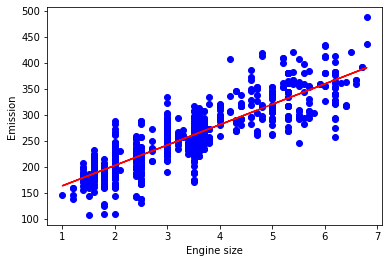

In [116]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, training_data_prediction, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Prediction and metrics

In [117]:
pred = regr_model.predict(X_test)

In [118]:
print("Mean absolute error: %.2f" % MAE(y_test, pred))
print("Squared sum of squares (MSE): %.2f" % MSE(y_test, pred))
print("R2-score: %.2f" % R2(y_test, pred) )

Mean absolute error: 23.02
Squared sum of squares (MSE): 946.34
R2-score: 0.79


Text(0, 0.5, 'Emission')

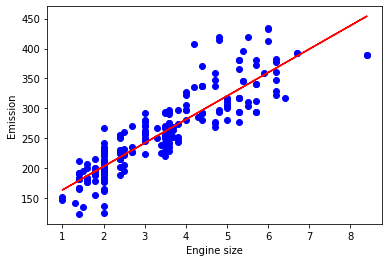

In [119]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, pred, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [123]:
accuracy_score(y_test, pred)

ValueError: ignored